In [1]:
print(1)

1


In [2]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


🚀 Starting data loading process...

📂 Setting up paths and constants...

📸 Loading training dataset...
Found 100000 files belonging to 2 classes.

🔍 Loading validation dataset...
Found 20000 files belonging to 2 classes.

🧪 Loading test dataset...
Found 20000 files belonging to 2 classes.

✅ Dataset directories scanned successfully!
Train batches: 3125
Validation batches: 625
Test batches: 625

🏷️ Class names: ['fake', 'real']

⚙️ Enabling prefetch optimization...

⏳ Previewing a few training batches to check progress...


Loading sample batches: 100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:13<00:00,  2.68s/it]


✅ Sample batches loaded successfully.

🖼️ Displaying sample images...


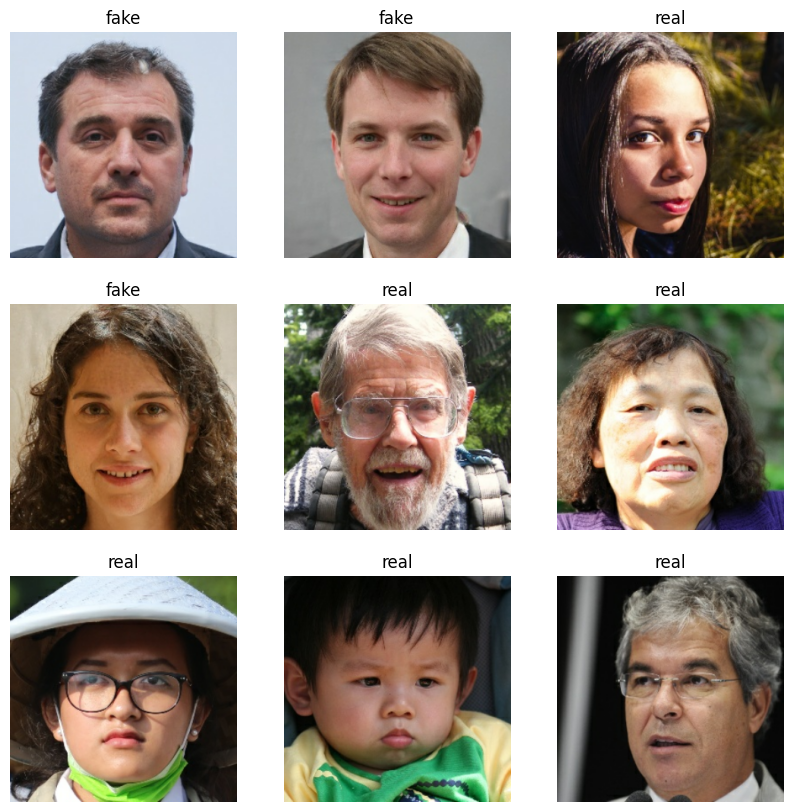


🎉 Data loading and visualization completed successfully!


In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm import tqdm  # progress bar

print("🚀 Starting data loading process...\n")

# === Paths & constants ===
print("📂 Setting up paths and constants...")
data_root = "raw_data/FakeVsReal"   # your dataset folder
IMG_SIZE = (299, 299)               # Xception default input size
BATCH_SIZE = 32

# === Load training dataset ===
print("\n📸 Loading training dataset...")
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory=f"{data_root}/train",
    label_mode="binary",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

# === Load validation dataset ===
print("\n🔍 Loading validation dataset...")
val_ds = tf.keras.utils.image_dataset_from_directory(
    directory=f"{data_root}/valid",
    label_mode="binary",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

# === Load test dataset ===
print("\n🧪 Loading test dataset...")
test_ds = tf.keras.utils.image_dataset_from_directory(
    directory=f"{data_root}/test",
    label_mode="binary",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

print("\n✅ Dataset directories scanned successfully!")
print("Train batches:", tf.data.experimental.cardinality(train_ds).numpy())
print("Validation batches:", tf.data.experimental.cardinality(val_ds).numpy())
print("Test batches:", tf.data.experimental.cardinality(test_ds).numpy())

# === Show detected class names ===
class_names = train_ds.class_names
print("\n🏷️ Class names:", class_names)

# === Prefetch for performance ===
print("\n⚙️ Enabling prefetch optimization...")
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(AUTOTUNE)
val_ds = val_ds.prefetch(AUTOTUNE)
test_ds = test_ds.prefetch(AUTOTUNE)

# === Preview progress: iterate over a few batches to confirm reading ===
print("\n⏳ Previewing a few training batches to check progress...")
for i, (images, labels) in enumerate(tqdm(train_ds.take(5), desc="Loading sample batches")):
    pass

print("✅ Sample batches loaded successfully.\n")

# === Visualize one batch ===
print("🖼️ Displaying sample images...")
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[int(labels[i])])
        plt.axis("off")
plt.show()

print("\n🎉 Data loading and visualization completed successfully!")


In [4]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications.xception import preprocess_input
from tqdm import tqdm  # progress bar

print("⚙️ Setting up preprocessing and augmentation for Xception...\n")

# === Data augmentation pipeline ===
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.05),
    layers.RandomZoom(0.1),
], name="data_augmentation")


def prepare_dataset(dataset, augment=False, name="dataset", show_progress=True):
    """
    Applies data augmentation (if enabled), Xception preprocessing, and prefetching.
    If show_progress=True, displays a tqdm progress bar for the full dataset.
    """
    AUTOTUNE = tf.data.AUTOTUNE

    def process_image(image, label):
        if augment:
            image = data_augmentation(image)
        image = preprocess_input(image)
        return image, label

    dataset = dataset.map(process_image, num_parallel_calls=AUTOTUNE)
    dataset = dataset.prefetch(AUTOTUNE)

    if show_progress:
        total_batches = tf.data.experimental.cardinality(dataset).numpy()
        print(f"\n🔄 Preprocessing {name} dataset ({total_batches} batches)...")
        for _ in tqdm(dataset, total=total_batches, desc=f"Processing {name}", unit="batch"):
            pass
        print(f"✅ Finished preprocessing {name} dataset.")

    return dataset


print("🔁 Starting preprocessing for all datasets...\n")

train_prepared = prepare_dataset(train_ds, augment=True,  name="train", show_progress=True)
val_prepared   = prepare_dataset(val_ds,   augment=False, name="validation", show_progress=True)
test_prepared  = prepare_dataset(test_ds,  augment=False, name="test", show_progress=True)

print("\n✅ All datasets preprocessed successfully and ready for model input!\n")

# === Sanity check on one batch ===
print("🔍 Checking preprocessed images (value range and shape)...")
for images, labels in train_prepared.take(1):
    print("Image batch shape:", images.shape)
    print("Label batch shape:", labels.shape)
    print("Pixel range: min =", float(tf.reduce_min(images).numpy()), 
          "max =", float(tf.reduce_max(images).numpy()))

print("\n🎉 Preprocessing verification successful!")


⚙️ Setting up preprocessing and augmentation for Xception...

🔁 Starting preprocessing for all datasets...


🔄 Preprocessing train dataset (3125 batches)...


Processing train: 100%|████████████████████████████████████████████████████████████████████████████████| 3125/3125 [34:06<00:00,  1.53batch/s]


✅ Finished preprocessing train dataset.

🔄 Preprocessing validation dataset (625 batches)...


Processing validation: 100%|█████████████████████████████████████████████████████████████████████████████| 625/625 [01:26<00:00,  7.23batch/s]


✅ Finished preprocessing validation dataset.

🔄 Preprocessing test dataset (625 batches)...


Processing test: 100%|███████████████████████████████████████████████████████████████████████████████████| 625/625 [01:25<00:00,  7.29batch/s]


✅ Finished preprocessing test dataset.

✅ All datasets preprocessed successfully and ready for model input!

🔍 Checking preprocessed images (value range and shape)...
Image batch shape: (32, 299, 299, 3)
Label batch shape: (32, 1)
Pixel range: min = -1.0 max = 1.0

🎉 Preprocessing verification successful!


In [5]:
# ───────────────────────────────
# 🧠 XCEPTION MODEL INITIALIZATION (for DeepFake Detection)
# ───────────────────────────────

import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks
from tensorflow.keras.applications import Xception

# === GPU / Device Check ===
print("🔍 Available devices:")
for device in tf.config.list_physical_devices():
    print("  •", device)
print("\n✅ TensorFlow version:", tf.__version__)
print("✅ GPU Available:", tf.config.list_physical_devices('GPU'))

# === Core Hyperparameters ===
IMG_SIZE = (299, 299, 3)
EPOCHS = 30
LEARNING_RATE = 1e-4
DENSE_UNITS = 256
DROPOUT_RATE = 0.5

# === Base Model (Transfer Learning) ===
base_model = Xception(
    weights="imagenet",
    include_top=False,
    input_shape=IMG_SIZE
)
base_model.trainable = False   # freeze base layers for first phase

# === Custom Classification Head ===
x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(DENSE_UNITS, activation="relu")(x)
x = layers.Dropout(DROPOUT_RATE)(x)
output = layers.Dense(1, activation="sigmoid")(x)

model = models.Model(inputs=base_model.input, outputs=output)

# === Optimizer & Callbacks ===
optimizer = optimizers.Adam(learning_rate=LEARNING_RATE)

early_stopping = callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.2,
    patience=2,
    min_lr=1e-6,
    verbose=1
)

checkpoint = callbacks.ModelCheckpoint(
    "xception_best_model.h5",
    monitor="val_accuracy",
    save_best_only=True,
    verbose=1
)

# === Compile Model ===
model.compile(
    optimizer=optimizer,
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

print("\n✅ Model initialized and compiled successfully!\n")
model.summary()


🔍 Available devices:
  • PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')
  • PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')

✅ TensorFlow version: 2.10.1
✅ GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

✅ Model initialized and compiled successfully!

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                    

In [7]:
import sys
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, LambdaCallback

print("🚀 Starting training process...\n")

# === Hyperparameters ===
EPOCHS = 30

# === Callbacks ===
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.3,
    patience=2,
    min_lr=1e-6,
    verbose=1
)

checkpoint = ModelCheckpoint(
    "deepfake_xception_best.keras",  # saves best model
    monitor='val_accuracy', 
    save_best_only=True,
    verbose=1
)

# flush stdout after each epoch (for tqdm safety)
flush_callback = LambdaCallback(on_epoch_end=lambda epoch, logs: sys.stdout.flush())

# === Train Model ===
history = model.fit(
    train_prepared,
    validation_data=val_prepared,
    epochs=EPOCHS,
    callbacks=[early_stopping, reduce_lr, checkpoint, flush_callback],
    verbose=1  # ensures live epoch updates
)

print("\n✅ Training complete! Best model saved as 'deepfake_xception_best.keras'.")


🚀 Starting training process...

Epoch 1/30
3125/3125 [==============================] - ETA: 0s - loss: 0.4718 - accuracy: 0.7765
Epoch 1: val_accuracy improved from -inf to 0.82865, saving model to deepfake_xception_best.keras
3125/3125 [==============================] - 2939s 930ms/step - loss: 0.4718 - accuracy: 0.7765 - val_loss: 0.3935 - val_accuracy: 0.8286 - lr: 1.0000e-04
Epoch 2/30
3125/3125 [==============================] - ETA: 0s - loss: 0.4228 - accuracy: 0.8070
Epoch 2: val_accuracy improved from 0.82865 to 0.84485, saving model to deepfake_xception_best.keras
3125/3125 [==============================] - 2537s 806ms/step - loss: 0.4228 - accuracy: 0.8070 - val_loss: 0.3594 - val_accuracy: 0.8449 - lr: 1.0000e-04
Epoch 3/30
3125/3125 [==============================] - ETA: 0s - loss: 0.3988 - accuracy: 0.8202
Epoch 3: val_accuracy improved from 0.84485 to 0.85300, saving model to deepfake_xception_best.keras
3125/3125 [==============================] - 2700s 859ms/step - 

In [9]:
import pickle

with open("training_history.pkl", "wb") as f:
    pickle.dump(history.history, f)

print("✅ Training history saved successfully as 'training_history.pkl'")


✅ Training history saved successfully as 'training_history.pkl'


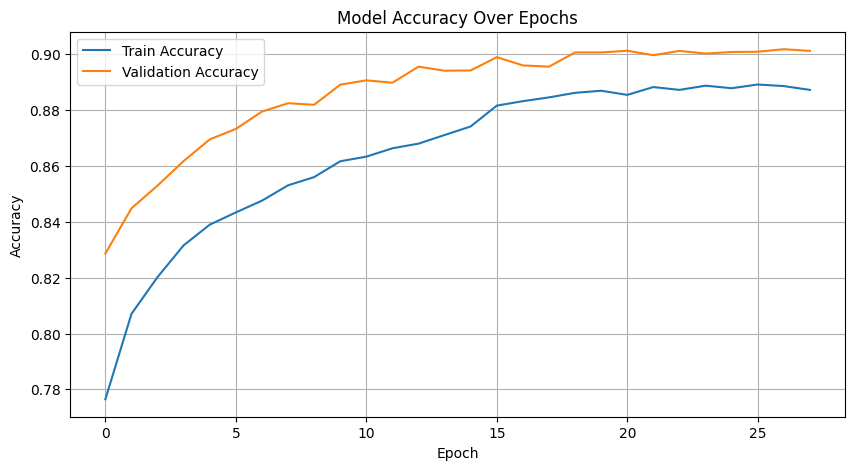

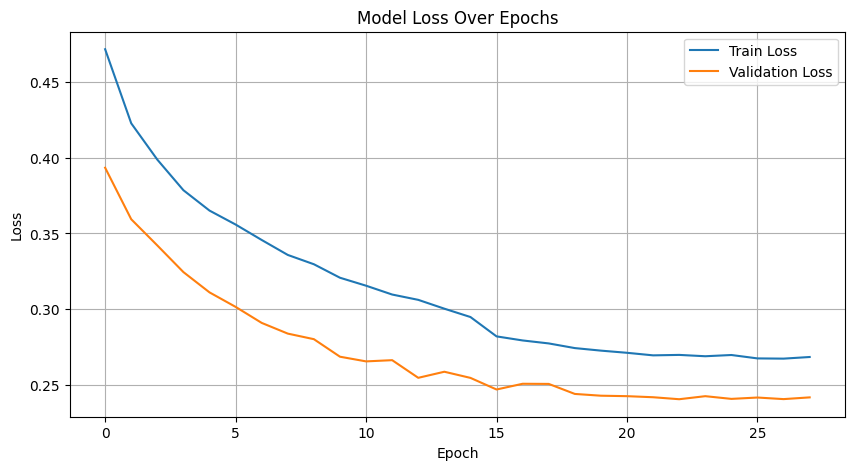

In [10]:
import pickle
import matplotlib.pyplot as plt

with open("training_history.pkl", "rb") as f:
    history_dict = pickle.load(f)

# Accuracy
plt.figure(figsize=(10,5))
plt.plot(history_dict['accuracy'], label='Train Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

# Loss
plt.figure(figsize=(10,5))
plt.plot(history_dict['loss'], label='Train Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


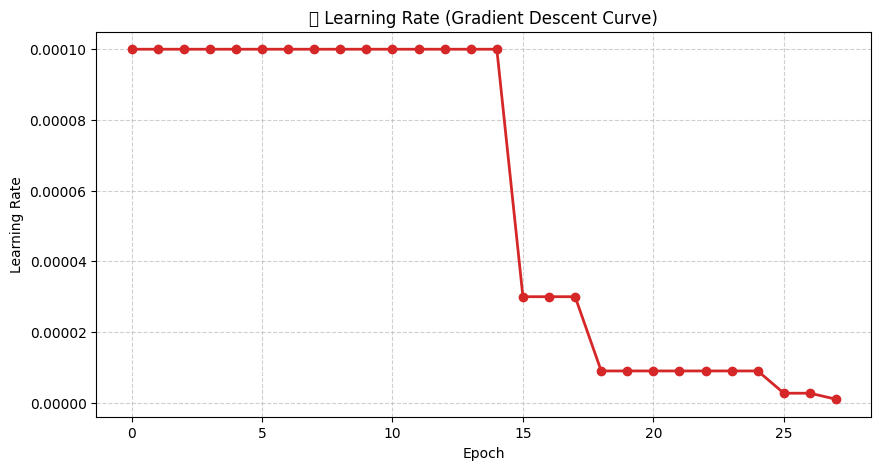

In [11]:
plt.figure(figsize=(10,5))
plt.plot(history_dict['lr'], marker='o', linewidth=2, color='tab:red')
plt.title("📉 Learning Rate (Gradient Descent Curve)")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


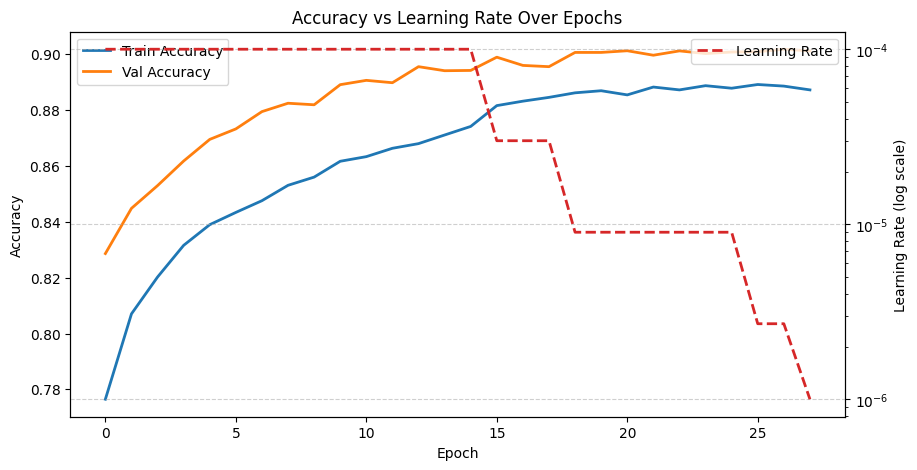

In [12]:
fig, ax1 = plt.subplots(figsize=(10,5))

ax1.plot(history_dict['accuracy'], label='Train Accuracy', color='tab:blue', linewidth=2)
ax1.plot(history_dict['val_accuracy'], label='Val Accuracy', color='tab:orange', linewidth=2)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(history_dict['lr'], label='Learning Rate', color='tab:red', linestyle='--', linewidth=2)
ax2.set_ylabel('Learning Rate (log scale)')
ax2.set_yscale('log')
ax2.legend(loc='upper right')

plt.title('Accuracy vs Learning Rate Over Epochs')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [19]:
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.models import load_model

# ==============================
# 🔧 Paths
# ==============================
BASE_DIR = r"D:\Projrct M\Capstone_Final\DeepFake"
MODEL_PATH = os.path.join(BASE_DIR, "deepfake_xception_best.keras")

# Load trained model
print("📦 Loading trained Xception model...")
model = load_model(MODEL_PATH)
print("✅ Model loaded successfully!\n")

# ==============================
# 🖼️ Function to predict a single image
# ==============================
def predict_image(img_path):
    print(f"🔍 Predicting for: {os.path.basename(img_path)}")
    
    # Load image and resize for Xception
    img = image.load_img(img_path, target_size=(299, 299))
    img_array = image.img_to_array(img)
    
    # Add batch dimension & preprocess for Xception
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    
    # Predict
    prediction = model.predict(img_array, verbose=0)[0][0]
    
    # Convert prediction to label
    label = "FAKE" if prediction < 0.5 else "REAL"
    confidence = prediction if label == "REAL" else 1 - prediction
    
    print(f"🧾 Prediction: {label} ({confidence * 100:.2f}% confidence)")
    return label, confidence

# ==============================
# 🔬 Example Usage
# ==============================
# Give any image path (from your test folder)
test_image_path = r"D:\Projrct M\Capstone_Final\DeepFake\raw_data\FakeVsReal\test\akhil.jpg"  # change to any test image
predict_image(test_image_path)


📦 Loading trained Xception model...
✅ Model loaded successfully!

🔍 Predicting for: akhil.jpg
🧾 Prediction: REAL (100.00% confidence)


('REAL', 0.99999857)

📂 Loading model from:
D:\Projrct M\Capstone_Final\DeepFake\deepfake_xception_best.keras


C:\Users\shanm\AppData\Local\Temp\ipykernel_17552\2733412024.py:38: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.savefig(save_path, dpi=300, bbox_inches='tight')
D:\Anaconda\envs\tf\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


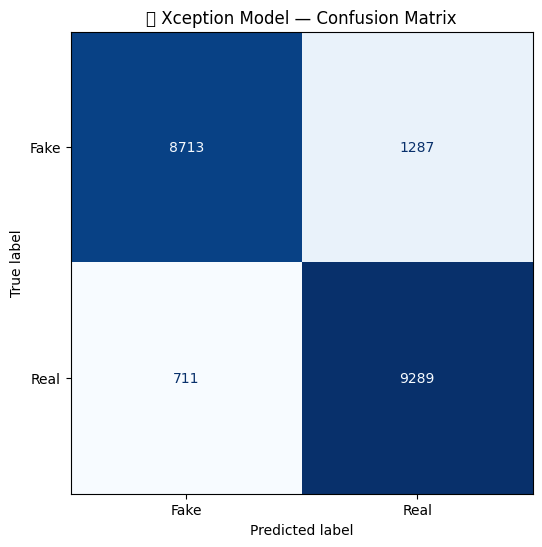


📊 Classification Report:

              precision    recall  f1-score   support

        Fake       0.92      0.87      0.90     10000
        Real       0.88      0.93      0.90     10000

    accuracy                           0.90     20000
   macro avg       0.90      0.90      0.90     20000
weighted avg       0.90      0.90      0.90     20000


✅ Confusion matrix image saved at:
D:\Projrct M\Capstone_Final\DeepFake\confusion_matrix_xception.png


In [13]:
import os
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# === Base directory ===
BASE_DIR = r"D:\Projrct M\Capstone_Final\DeepFake"

# === Load your trained model ===
model_path = os.path.join(BASE_DIR, "deepfake_xception_best.keras")
print(f"📂 Loading model from:\n{model_path}")
model = tf.keras.models.load_model(model_path)

# === Generate predictions on test data ===
y_true, y_pred_prob = [], []

for images, labels in test_prepared:
    preds = model.predict(images, verbose=0)
    y_pred_prob.extend(preds)
    y_true.extend(labels.numpy())

y_true = np.array(y_true)
y_pred = (np.array(y_pred_prob) > 0.5).astype(int).flatten()

# === Confusion matrix ===
cm = confusion_matrix(y_true, y_pred)
labels = ['Fake', 'Real']

# === Plot Confusion Matrix ===
fig, ax = plt.subplots(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', ax=ax, colorbar=False)
plt.title("🧠 Xception Model — Confusion Matrix")

# === Save Confusion Matrix ===
save_path = os.path.join(BASE_DIR, "confusion_matrix_xception.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

# === Print classification report ===
print("\n📊 Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=labels))

print(f"\n✅ Confusion matrix image saved at:\n{save_path}")
